# Setup

## 참고문서
- https://wikidocs.net/book/14314
- https://wikidocs.net/book/14473

## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '생성한 키 입력'

## 구글 드라이브 연결

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


## install

In [ ]:
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain_huggingface langchain-openai langsmith langchainhub pymupdf sentence-transformers faiss-cpu pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/

# [Retriever](https://wikidocs.net/233779)
- Retrieval Augmented Generation (RAG)에서 `검색도구(Retrievers)` 는 벡터 저장소에서 문서를 검색하는 도구입니다.
- LangChain은 간단한 의미 검색도구부터 성능 향상을 위해 고려된 다양한 검색 알고리즘을 지원합니다.

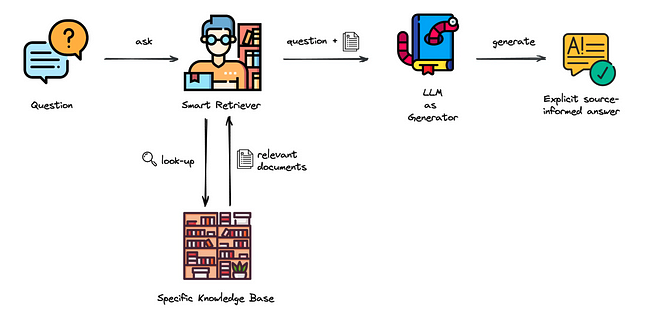

## Vector Store Retriver
- 벡터스토어 검색도구(Vector Store Retriever)를 사용하면 대량의 텍스트 데이터에서 관련 정보를 효율적으로 검색할 수 있습니다.

### 사전 준비 - 문서 로드 및 분할

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings

loader = PyMuPDFLoader(DATA_PATH+'000660_SK_2023.pdf')
data = loader.load()
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000,
    chunk_overlap=200,
    encoding_name='cl100k_base'
)

documents = text_splitter.split_documents(data)
len(documents)

55

### 사전 준비 - 문서 임베딩을 벡터스토어에 저장

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores.utils import DistanceStrategy
from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings_model = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sbert-nli',
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True},
)


vectorstore = FAISS.from_documents(documents,
                                   embedding = embeddings_model,
                                   distance_strategy = DistanceStrategy.COSINE
                                  )

### 단일 문서 검색

In [ ]:
query = 'SK주식회사는 4대 핵심 투자 알려줘'

# 가장 유사도가 높은 문장을 하나만 추출
retriever = vectorstore.as_retriever(search_kwargs={'k': 1})

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[0]

1


<ipython-input-12-f397e0ce9d85>:6: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  docs = retriever.get_relevant_documents(query)


Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 5, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09'00'", 'modDate': "D:20230626172106+09'00'", 'trapped': ''}, page_content='11\n10\nESG Special Report 2023\nWhere we are heading    |     How we get there    |     What we are preparing\nSK의\n 끊\n임\n없\n는\n 도\n전\n과\n 미\n래\n를\n 앞\n서\n가\n는\n 혜\n안\n을\n \n바\n탕\n으\n로\n SK그\n룹\n의\n 지\n주\n사\n인\n SK주\n식\n회\n사\n는\n, 2021년\n \n투\n자\n전\n문\n회\n사\n로\n의\n 도\n약\n을\n 선\n언\n했\n습\n니\n다\n. SK주\n식\n회\n사\n는\n \n새\n로\n운\n 성\n장\n영\n역\n으\n로\n의\n 포\n트\n폴\n리\n오\n 재\n편\n과\n 더\n불\n어\n, \n기\n업\n가\n치\n 극\n대\n화\n를\n 위\n한\n 또\n 한\n번\n의\n 새\n로\n운\n 성\n장\n 기\n회\n를\n \n모\n색\n하\n고\n 있\n습\n

### MMR(Maximal Marginal Relevance) 검색

In [ ]:
# MMR - 다양성 고려 (lambda_mult = 0.5)
retriever = vectorstore.as_retriever(
    search_type='mmr',
    search_kwargs={'k': 5, 'fetch_k': 50}
)

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[0]

5


Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 5, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09'00'", 'modDate': "D:20230626172106+09'00'", 'trapped': ''}, page_content='11\n10\nESG Special Report 2023\nWhere we are heading    |     How we get there    |     What we are preparing\nSK의\n 끊\n임\n없\n는\n 도\n전\n과\n 미\n래\n를\n 앞\n서\n가\n는\n 혜\n안\n을\n \n바\n탕\n으\n로\n SK그\n룹\n의\n 지\n주\n사\n인\n SK주\n식\n회\n사\n는\n, 2021년\n \n투\n자\n전\n문\n회\n사\n로\n의\n 도\n약\n을\n 선\n언\n했\n습\n니\n다\n. SK주\n식\n회\n사\n는\n \n새\n로\n운\n 성\n장\n영\n역\n으\n로\n의\n 포\n트\n폴\n리\n오\n 재\n편\n과\n 더\n불\n어\n, \n기\n업\n가\n치\n 극\n대\n화\n를\n 위\n한\n 또\n 한\n번\n의\n 새\n로\n운\n 성\n장\n 기\n회\n를\n \n모\n색\n하\n고\n 있\n습\n

- MMR은 검색 결과의 관련성과 다양성을 균형있게 조정하는 방식입니다.
- `lambda_mult` 매개변수는 관련성과 다양성 사이의 균형을 조정합니다.
- 여기서 `lambda_mult가 0.15`로 설정되어 있으므로, 관련성보다 다양성을 더 우선하게 됩니다.

In [ ]:
# MMR - 다양성 고려 (lambda_mult 작을수록 더 다양하게 추출)
retriever = vectorstore.as_retriever(
    search_type='mmr',
    search_kwargs={'k': 5, 'lambda_mult': 0.15}
)

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[-1]

5


Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 6, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09'00'", 'modDate': "D:20230626172106+09'00'", 'trapped': ''}, page_content='13\n12\nESG Special Report 2023\nWhere we are heading    |     How we get there    |     What we are preparing\n북\n미\n3.5(41%)\n중\n국\n0.8(9%)\nEU\n0.6(7%)\nSK주\n식\n회\n사\n는\n ESG기\n반\n의\n 4대\n 핵\n심\n사\n업\n을\n 중\n심\n으\n로\n \n장\n기\n적\n 관\n점\n의\n 투\n자\n 전\n략\n을\n 실\n행\n하\n고\n 있\n습\n니\n다\n.\n2022년\n에\n는\n 앵\n커\n 자\n산\n과\n 신\n규\n 투\n자\n를\n 연\n계\n한\n 투\n자\n \n성\n과\n로\n 매\n출\n액\n과\n 영\n업\n이\n익\n 성\n장\n을\n 이\n루\n어\n 냈\n습\n니\n다\n. \n또\n한\n 투\n명\n한\n ESG 정\n보\n공\n개\n와\n 이\n해\n관\n계\n자\n 소\n통

### Generation - 답변 생성
-  벡터 저장소에서 문서를 검색한 다음, 이를 기반으로 ChatGPT 모델에 쿼리를 수행하는 end-to-end 프로세스를 구현합니다.
- 이 과정을 통해 사용자의 질문에 대한 의미적으로 관련이 있는 답변을 생성할 수 있습니다.

1. `검색 (Retrieval)`
  - vectorstore.as_retriever를 사용하여 MMR(Maximal Marginal Relevance) 검색 방식으로 문서를 검색합니다.
  - search_kwargs에 k: 5와 lambda_mult: 0.15를 설정하여 상위 5개의 관련성이 높으면서도 다양한 문서를 선택합니다.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser


# Retrieval
retriever = vectorstore.as_retriever(
    search_type='mmr',
    search_kwargs={'k': 5, 'lambda_mult': 0.15}
)

docs = retriever.get_relevant_documents(query)

2. `프롬프트 생성 (Prompt)`
  - ChatPromptTemplate를 사용하여 쿼리에 대한 답변을 생성하기 위한 템플릿을 정의합니다.
  - 여기서 {context}는 검색된 문서의 내용이고, {question}은 사용자의 쿼리입니다.

In [ ]:
# Prompt
template = '''Answer the question based only on the following context:
{context}

Question: {question}
'''

prompt = ChatPromptTemplate.from_template(template)

3. `모델 (Model)`
  - ChatOpenAI를 사용하여 OpenAI의 GPT 모델을 초기화합니다.
  - 이 예에서는 'gpt-3.5-turbo-0125' 모델을 사용하며, temperature를 0으로 설정하여 결정론적인 응답을 생성하고, max_tokens를 500으로 설정하여 응답의 길이를 제한합니다.

In [ ]:
# Model
llm = ChatOpenAI(
    model='gpt-3.5-turbo-0125',
    temperature=0,
    max_tokens=500,
)

4. `문서 포맷팅 (Formatting Docs)`
  - 검색된 문서(docs)를 포맷팅하는 format_docs 함수를 정의합니다.
  - 이 함수는 각 문서의 page_content를 가져와 두 개의 문단 사이에 두 개의 줄바꿈을 삽입하여 문자열로 결합합니다.

In [ ]:
def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

5. `체인 실행 (Chain Execution)`
  - `prompt | llm | StrOutputParser()`를 사용하여 LLM 체인을 구성하고 실행합니다.
  - 프롬프트를 통해 정의된 쿼리를 모델에 전달하고, 모델의 응답을 문자열로 파싱합니다.

In [ ]:
# Chain
chain = prompt | llm | StrOutputParser()

6. `실행 (Run)`
  - chain.invoke 메서드를 사용하여 체인을 실행합니다.
  - context로는 포맷팅된 문서 내용이고, question은 사용자의 쿼리입니다. 최종 응답은 response 변수에 저장됩니다.

In [ ]:
# Run
response = chain.invoke({'context': (format_docs(docs)), 'question':query})
response

'SK주식회사는 ESG 기반의 4대 핵심 영역 포트폴리오를 중심으로 장기적 관점의 투자 전략을 실행하고 있습니다. 이 포트폴리오는 첨단소재고성장, 반도체/전력반도체/배터리, 그린 산업의 성장 거점 선점 및 넷제로 실현을 위한 탈탄소 기술 기업 자산 확보, 그리고 디지털 혁신을 선도하는 새로운 주력 사업 영역을 포함하고 있습니다.'

## Multi Query Retriever
- 멀티 쿼리 검색도구(MultiQueryRetriever)는 벡터스토어 검색도구(Vector Store Retriever)의 한계를 극복하기 위해 고안된 방법입니다.
- 사용자가 입력한 쿼리의 의미를 다각도로 포착하여 검색 효율성을 높이고, LLM을 활용하여 사용자에게 보다 관련성 높고 정확한 정보를 제공하는 것을 목표로 합니다.

다음 코드는 MultiQueryRetriever 클래스를 사용하여 여러 쿼리에 기반한 문서 검색 과정을 설정하고 실행하는 방법을 보여줍니다.
1. `MultiQueryRetriever 설정`: from_llm 메서드를 통해, 기존 벡터저장소 검색도구(vectorstore.as_retriever())와 LLM 모델(llm)을 결합하여 MultiQueryRetriever 인스턴스를 생성합니다. 이때 LLM은 다양한 관점의 쿼리를 생성하는 데 사용됩니다.
2. `로깅 설정`: 로깅을 설정하여 MultiQueryRetriever에 의해 생성되고 실행되는 쿼리들에 대한 정보를 로그로 기록하고 확인할 수 있습니다. 검색 과정에서 어떤 쿼리들이 생성되고 사용되었는지 이해하는 데 도움이 됩니다.
3. `문서 검색 실행`: get_relevant_documents 메서드를 사용하여 주어진 사용자 쿼리(question)에 대해 멀티 쿼리 기반의 문서 검색을 실행합니다. 생성된 모든 쿼리에 대해 문서를 검색하고, 중복을 제거하여 고유한 문서들만을 결과로 반환합니다.
4. `결과 확인`: 검색을 통해 반환된 고유 문서들의 수를 확인합니다. 멀티 쿼리 접근 방식을 통해 얼마나 많은 관련 문서가 검색되었는지를 나타냅니다.

In [ ]:
from langchain.retrievers.multi_query import MultiQueryRetriever

question = 'SK주식회사는 4대 핵심 투자 알려줘'

llm = ChatOpenAI(
    model='gpt-3.5-turbo-0125',
    temperature=0,
    max_tokens=500,
)

retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vectorstore.as_retriever(), llm=llm
)

# Set logging for the queries
import logging

logging.basicConfig()
logging.getLogger('langchain.retrievers.multi_query').setLevel(logging.INFO)

unique_docs = retriever_from_llm.get_relevant_documents(query=question)
len(unique_docs)

INFO:langchain.retrievers.multi_query:Generated queries: ['1. SK주식회사의 주요 투자 사업은 무엇인가요?', '2. SK주식회사의 핵심 사업 분야는 무엇인가요?', '3. SK주식회사가 주로 투자하는 사업은 무엇인가요?']


4

In [ ]:
unique_docs[1]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 5, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09'00'", 'modDate': "D:20230626172106+09'00'", 'trapped': ''}, page_content='식\n회\n사\n, SK C&C 합\n병\n \n및\n 지\n주\n/사\n업\n부\n문\n 구\n분\n•  \x07반\n도\n체\n, 바\n이\n오\n 등\n 유\n망\n 성\n장\n \n전\n망\n 분\n야\n에\n 선\n제\n적\n 투\n자\n2007\n지\n주\n사\n 체\n제\n 전\n환\n• \x07경\n영\n효\n율\n성\n과\n \t\n\t\n재\n무\n건\n전\n성\n 제\n고\n를\n 위\n한\n \t\n선\n진\n 경\n영\n시\n스\n템\n 도\n입\n \nHolding Company  \nOUR JOURNEY\n: Transforming \ninto an Investment \nCompany')

In [ ]:
unique_docs[2]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 19, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09'00'", 'modDate': "D:20230626172106+09'00'", 'trapped': ''}, page_content='2023 SK Inc. ESG Special Report\n발\n간\n  SK주\n식\n회\n사\n(w\nw\nw\n.sk-inc.com\n)  \n보\n고\n서\n 제\n작\n  Portfolio기\n획\n실\n문\n의\n  서\n울\n 종\n로\n구\n 종\n로\n 26 SK서\n린\n빌\n딩\n  |  sustainability@\nsk.com\n  \n본\n 보\n고\n서\n는\n FSCⓇ\n(Forest Stew\nardship CouncilⓇ\n)인\n증\n을\n 받\n은\n 용\n지\n를\n \n사\n용\n하\n였\n으\n며\n, 콩\n기\n름\n 잉\n크\n로\n 인\n쇄\n되\n었\n습\n니\n다\n. FSCⓇ\n마\n크\n는\n 사\n회\n, 경\n제\n, 환\n경\n적\n \n관\n점\n에\n서\n 지\n속\n가\n능\n하\n게\n 관\n리\n된\n 삼\n림\n내\n에\n서\n 길\n러\n진\n 나\n무\n를\n 사\n용\n한\n 제

앞에서 정의한 MultiQueryRetriever(retriever_from_llm)를 활용하여 여러 쿼리를 생성하고 검색된 문서를 기반으로 사용자 질문에 답변하는 과정을 살펴봅니다.
1. `프롬프트 설정`: 사용자의 질문에 대한 답변을 생성하기 위한 프롬프트 템플릿을 정의합니다. 여기서 {context}는 검색된 문서의 내용을 나타내고, {question}은 사용자의 질문입니다.
2. `모델 초기화`: ChatOpenAI 클래스를 사용하여 GPT-3.5-turbo 모델을 초기화합니다. temperature를 0으로 설정하여 일관된 답변을 생성합니다.
3. `문서 포맷팅 함수 정의`: 검색된 문서들을 하나의 문자열로 포맷팅하는 함수를 정의합니다. 이 함수는 각 문서 내용을 두 개의 줄바꿈으로 구분하여 결합합니다.
4. `체인 정의 및 실행`: RunnablePassthrough를 사용하여 사용자의 질문을 그대로 전달합니다. 이후 검색된 문서(context)와 사용자의 질문(question)을 prompt에 전달하고, 생성된 프롬프트를 GPT-3.5-turbo 모델에 입력으로 제공합니다. StrOutputParser를 사용하여 모델의 출력을 문자열로 파싱합니다.
5. `실행 및 응답 생성`: chain.invoke 메서드를 호출하여 전체 프로세스를 실행합니다. 입력으로 "카카오뱅크의 최근 영업실적을 요약해서 알려주세요."라는 질문을 사용합니다. 이 과정을 통해 검색된 문서의 내용을 기반으로 한 답변이 생성됩니다.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough


# Prompt
template = '''Answer the question based only on the following context:
{context}

Question: {question}
'''

prompt = ChatPromptTemplate.from_template(template)

# Model
llm = ChatOpenAI(
    model='gpt-3.5-turbo-0125',
    temperature=0,
)

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

# Chain
chain = (
    {'context': retriever_from_llm | format_docs, 'question': RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Run
response = chain.invoke('SK주식회사는 4대 핵심 투자 알려줘.')
response

INFO:langchain.retrievers.multi_query:Generated queries: ['1. SK주식회사의 주요 투자 분야는 무엇인가요?', '2. SK주식회사가 중점적으로 투자하는 사업은 무엇인가요?', '3. SK주식회사의 주요 투자 사업 부문은 어떤 것이 있나요?']


'SK주식회사는 성장 한계 자산을 선제적, 적극적으로 매각하여 잠재가치를 최대한 회수함으로써 투자의 선순환 체계를 강화하고 있습니다.'

## Contextual compression
- 컨텍스트 압축 기법은 검색된 문서 중에서 쿼리와 관련된 정보만을 추출하여 반환하는 것을 목표로 합니다.
- 쿼리와 무관한 정보를 제거하는 방시으로 답변의 품질을 높이고 비용을 줄일 수 있습니다.

### 기본 검색기 정의

1. `기본 검색기(Base Retriever) 설정`
  - vectorstore.as_retriever 함수를 사용하여 기본 검색기를 설정합니다.
  - 여기서 search_type='mmr'와 search_kwargs={'k':7, 'fetch_k': 20}는 검색 방식을 설정합니다.
  - mmr 검색 방식은 다양성을 고려한 검색 결과를 제공하여, 단순히 가장 관련성 높은 문서만 반환하는 대신 다양한 관점에서 관련된 문서들을 선택합니다.
2. `쿼리 처리 및 문서 검색`
  - base_retriever.get_relevant_documents(question) 함수를 사용하여 주어진 쿼리에 대한 관련 문서를 검색합니다.
  - 이 함수는 쿼리와 관련성 높은 문서들을 반환합니다.
3. `결과 출력`
  - print(len(docs))를 통해 검색된 문서의 수를 출력합니다.

In [ ]:
question = 'SK주식회사는 4대 핵심 투자 알려줘.'

llm = ChatOpenAI(
    model='gpt-3.5-turbo-0125',
    temperature=0,
    max_tokens=500,
)

base_retriever = vectorstore.as_retriever(
                                search_type='mmr',
                                search_kwargs={'k':7, 'fetch_k': 20})

docs = base_retriever.get_relevant_documents(question)
print(len(docs))

7


In [ ]:
docs

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 5, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09'00'", 'modDate': "D:20230626172106+09'00'", 'trapped': ''}, page_content='11\n10\nESG Special Report 2023\nWhere we are heading    |     How we get there    |     What we are preparing\nSK의\n 끊\n임\n없\n는\n 도\n전\n과\n 미\n래\n를\n 앞\n서\n가\n는\n 혜\n안\n을\n \n바\n탕\n으\n로\n SK그\n룹\n의\n 지\n주\n사\n인\n SK주\n식\n회\n사\n는\n, 2021년\n \n투\n자\n전\n문\n회\n사\n로\n의\n 도\n약\n을\n 선\n언\n했\n습\n니\n다\n. SK주\n식\n회\n사\n는\n \n새\n로\n운\n 성\n장\n영\n역\n으\n로\n의\n 포\n트\n폴\n리\n오\n 재\n편\n과\n 더\n불\n어\n, \n기\n업\n가\n치\n 극\n대\n화\n를\n 위\n한\n 또\n 한\n번\n의\n 새\n로\n운\n 성\n장\n 기\n회\n를\n \n모\n색\n하\n고\n 있\n습\

### 문서 압축기의 구성과 작동 방식
- 문서 압축기는 기본 검색기로부터 얻은 문서들을 더욱 효율적으로 압축하여, 쿼리와 가장 관련이 깊은 내용만을 추려내는 것을 목표로 합니다.
- `LLMChainExtractor`와 `ContextualCompressionRetriever` 클래스를 사용합니다.

1. `LLMChainExtractor 설정`
  - LLMChainExtractor.from_llm(llm)를 사용하여 문서 압축기를 설정합니다.
  - 언어 모델(llm)을 사용하여 문서 내용을 압축합니다.
2. `ContextualCompressionRetriever 설정`
  - ContextualCompressionRetriever 인스턴스를 생성할 때, base_compressor와 base_retriever를 인자로 제공합니다.
  - base_compressor는 앞서 설정한 LLMChainExtractor 인스턴스이며, base_retriever는 기본 검색기 인스턴스입니다.
  - 이 두 구성 요소를 결합하여 검색된 문서들을 압축하는 과정을 처리합니다.
3. `압축된 문서 검색`
  - compression_retriever.get_relevant_documents(question) 함수를 사용하여 주어진 쿼리에 대한 압축된 문서들을 검색합니다.
  - 기본 검색기를 통해 얻은 문서들을 문서 압축기를 사용하여 내용을 압축하고, 쿼리와 가장 관련된 내용만을 추려냅니다.
4. `결과 출력`
  - print(len(compressed_docs))를 통해 압축된 문서의 수를 출력합니다.

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=base_retriever
)

compressed_docs = compression_retriever.get_relevant_documents(question)
print(len(compressed_docs))

4


In [ ]:
compressed_docs

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 5, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09'00'", 'modDate': "D:20230626172106+09'00'", 'trapped': ''}, page_content='SK주식회사는 4대 핵심 투자 중심의 성장 방식을 구체화하였습니다.'),
 Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 6, 'total_pages': 21, 'format': 'PDF 1.6', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Adobe InDesign 16.2 (Macintosh)', 'producer': 'Adobe PDF Library 15.0', 'creationDate': "D:20230626161631+09

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough


# Prompt
template = '''Answer the question based only on the following context:
{context}

Question: {question}
'''

prompt = ChatPromptTemplate.from_template(template)

# Model
llm = ChatOpenAI(
    model='gpt-3.5-turbo-0125',
    temperature=0,
)

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

# Chain
chain = (
    {'context': compression_retriever | format_docs, 'question': RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Run
response = chain.invoke('SK주식회사는 4대 핵심 투자 알려줘.')
response

'SK주식회사의 4대 핵심 투자 영역은 첨단소재고성장, GREEN 산업, 디지털 혁신, 그리고 후보군 발굴 및 신기술 투자입니다.'

# [Reranker](https://wikidocs.net/253434)
- Reranker(리랭커)는 현대적인 두 단계 검색 시스템(Two-Stage Retrieval System)에서 사용되는 핵심 컴포넌트입니다. 대규모 데이터셋에서 효율적이고 정확한 검색을 수행하기 위해 설계되었으며, 주로 첫 번째 단계인 Retriever가 찾아낸 문서들의 순위를 재조정하는 역할을 합니다.

## [Reranker가 필요한 이유](https://aws.amazon.com/ko/blogs/tech/korean-reranker-rag/)

먼저 현재 RAG의 문제점에 대해서 살펴보도록 하겠습니다. RAG는 수많은 텍스트 문서에서 의미론적 검색 (Semantic search) 과정을 수행합니다. 의미론적 검색에는 일반적으로 벡터 검색을 활용 되는데, 이 과정에서 두 가지 정보 손실이 발생하게 됩니다.
- `첫 번째는 문서의 임베딩 벡터 변환 과정에서의 손실입니다.` 임베딩 벡터 변환이란 문서를 n개의 숫자로 재 표현하는 것을 의미하는데, 정보의 손실은 문서가 긴 경우에 정해진 벡터의 차원으로 표현하기 어려울 때 발생하게 됩니다.
- `두 번째는 검색 과정에서의 손실입니다.` RAG는 검색 시간 단축을 위해 Approximate Nearnest Neighbor search (ANNs) 기술을 활용합니다. 이 방법은 질문과 문서 사이의 관련성 체크 횟수를 현저히 줄임으로써 검색속도를 높일 수 있습니다. 하지만 이 과정에서 발생하는 관련성 정확도 하락이 정보의 손실로 나타나게 됩니다. 이러한 정보 손실로 인해 LLM으로 전달되는 컨텍스트의 상위 k개 이내에서 질문에 대한 관련 정보가 누락되는 경우가 발생합니다.

- 이러한 문제는 검색 후 반환되는 문서수를 늘림 (k 증가) 으로써 간단히 해결할 수 있습니다. 하지만 이 방법은 LLM에 전달하는 컨텍스트가 늘어나기 때문에 비용 효율적이지 않습니다.
- 그 뿐만이 아닙니다. 최근 출판된 논문에 따르면 RAG의 정확도는 관련정보의 컨텍스트 내 존재 유무가 아닌, 순서라는 것을 발견하였습니다.

즉, 관련 정보가 컨텍스트 내 상위권에 위치하고 있을 때 좋은 답변을 얻을 수 있다는 뜻 입니다.

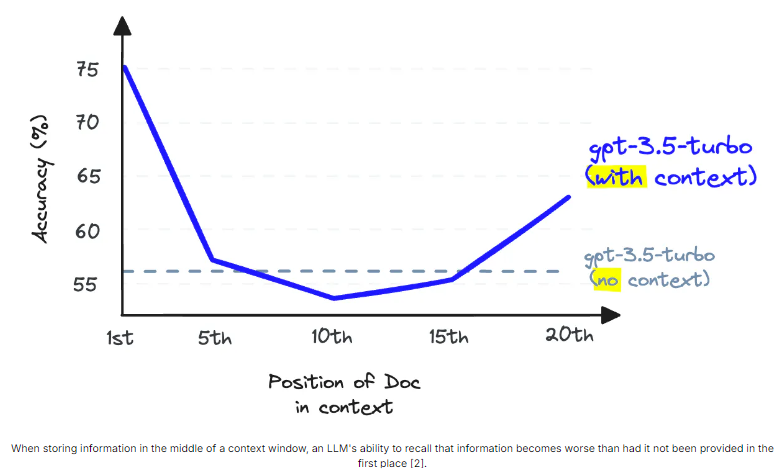

##[Power of Rerankers](https://www.pinecone.io/learn/series/rag/rerankers/)
- 기존에 벡터 검색을 위해 사용하는 구조가 `Bi-encoder`라면, `rerank`를 위한 구조는 `Cross-encoder`입니다.
- `Bi-encoder`는 질의와 정보를 각각 임베딩한 후 유사도를 계산합니다.
- `Cross-encoder`는 질의와 정보를 입력으로 사용하여 유사도를 출력합니다. 질의와 정보를 각각 입력하고 유사도를 얻는 `Bi-encoder`와 다르게 질의와 정보의 내용을 한번에 고려하기 때문에 더욱 정확한 유사도를 얻을 수 있다고 합니다. 이 유사도를 사용하여 질의와의 관련성에 따라 정보(문서)를 재정렬합니다.
- 하지만 `Cross-encoder`는 모든 조합들을 활용해 인풋으로 활용해야 하기 때문에, 비용이 높습니다. 때문에 일반적인 벡터 검색(`retrieval`)을 진행한 후, `reranker` 기반으로 순위를 재정렬하는 경우가 일반적입니다.


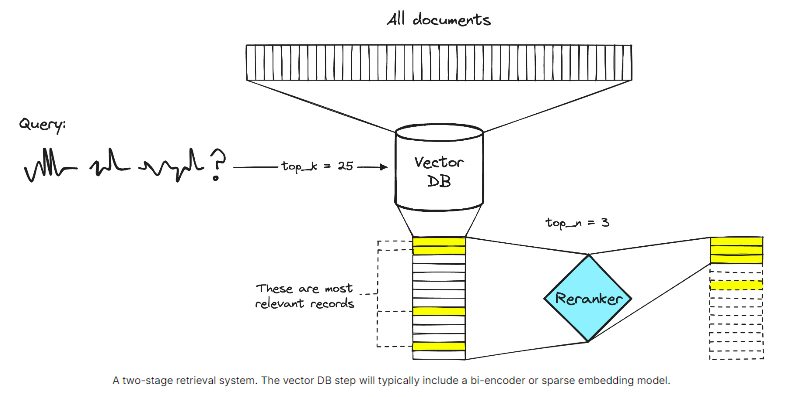

### Bi-encoder

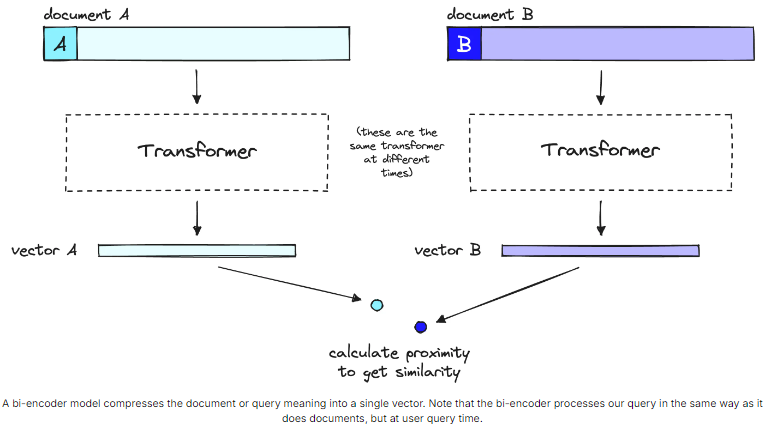

### Cross-encoder

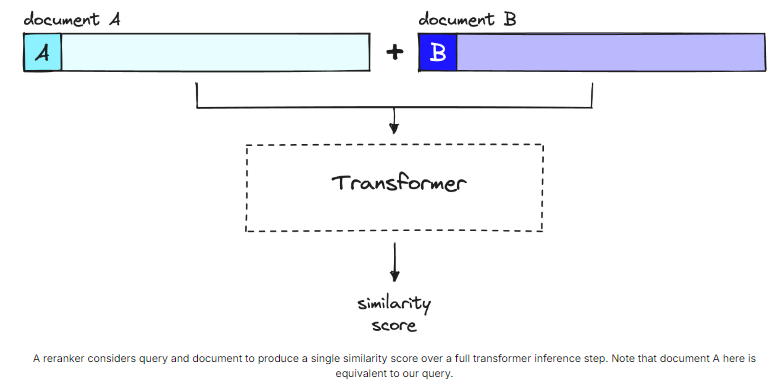

## Reranker 장단점

- 장점
  - 검색 정확도 크게 향상
  - 복잡한 의미적 관계 모델링 가능
  - 첫 단계 검색의 한계 보완
- 단점
  - 계산 비용 증가
  - 처리 시간 증가
  - 대규모 데이터셋에 직접 적용 어려움

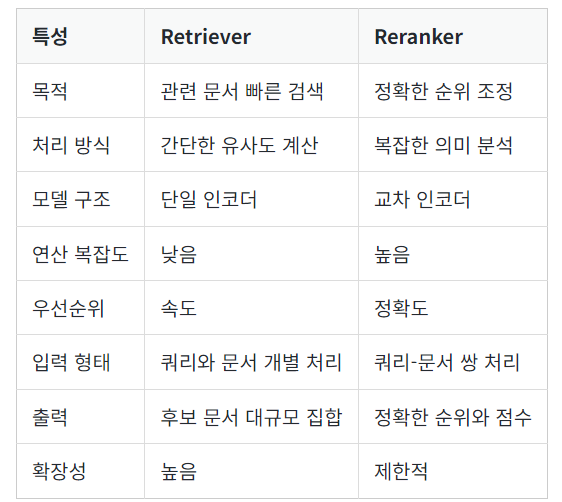

## Reranker 예제
- Cross encoder reranker는 검색 증강 생성(RAG) 시스템의 성능을 향상시키기 위해 사용되는 기술입니다. 이 문서는 Hugging Face의 cross encoder 모델을 사용하여 retriever에서 reranker를 구현하는 방법을 설명합니다.

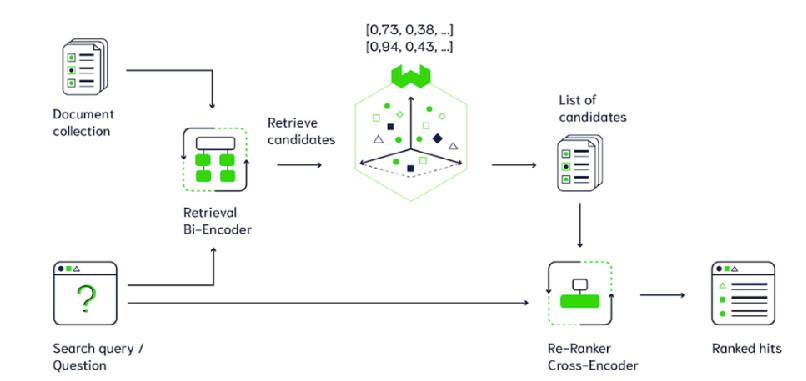

In [ ]:
# 문서 출력 도우미 함수
def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

### Vector DB

- 문서 로드

In [ ]:
# 문서 로드
documents = TextLoader(DATA_PATH+"appendix-keywords.txt").load()

In [ ]:
documents

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/appendix-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer\n\n정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.\n예시: "I love programming."이라는 문장을 ["I", "love", "programming", "."]으로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nVectorStore\n\n정의: 벡터스토어는 벡터 형식으로 변환된 데이터를 저장하는 시스템입니다. 이는 검색, 분류 및 기타 데이터 분석 작업에 사용됩니다.\n예시: 단어 임베딩 벡터들을 데이터베이스에 저장하여 빠르게 접근할 수 있습니다.\n연관키워드: 임베딩, 

- 텍스트 분할기 설정

In [ ]:
# 텍스트 분할기 설정
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)

In [ ]:
text_splitter

- 문서 분할

In [ ]:
# 문서 분할
texts = text_splitter.split_documents(documents)

In [ ]:
len(texts)

15

- 임베딩 모델 설정

In [ ]:
# 임베딩 모델 설정
embeddingsModel = HuggingFaceEmbeddings(
    model_name="sentence-transformers/msmarco-distilbert-dot-v5"
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddingsModel

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
), model_name='sentence-transformers/msmarco-distilbert-dot-v5', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

- 문서로부터 FAISS 인덱스 생성

In [ ]:
vector_db = FAISS.from_documents(texts, embeddingsModel)

In [ ]:
vector_db

### Retriever

- 검색기 설정

In [ ]:
# 검색기 설정
retriever = vector_db.as_retriever(
    search_kwargs={"k": 10}
)

In [ ]:
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x791c7ef8e800>, search_kwargs={'k': 10})

- 질의 설정

In [ ]:
# 질의 설정
query = "Word2Vec 에 대해서 알려줄래?"

- 질의 수행 및 결과 문서 반환

In [ ]:
# 질의 수행 및 결과 문서 반환
docs = retriever.invoke(query)

In [ ]:
len(docs)

10

- 결과 문서 출력

In [ ]:
# 결과 문서 출력
pretty_print_docs(docs)

Document 1:

Open Source

정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser
----------------------------------------------------------------------------------------------------
Document 2:

정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.
예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.
연관키워드: 자연어 처리, 딥러닝, 텍스트 생성

FAISS (Facebook AI Similarity Search)

정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.
예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.
연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화

Open Source
----------------------------------------------------------------------------------------------------
Document 3:

InstructGPT

정의: Ins

### [CrossEncoderReranker](https://weaviate.io/blog/cross-encoders-as-reranker)
- 기본 retriever를 `ContextualCompressionRetriever`로 감싸보겠습니다. `CrossEncoderReranker`는 HuggingFaceCrossEncoder를 사용하여 반환된 결과를 재정렬합니다.
- 다국어 지원 BGE Reranker: `bge-reranker-v2-m3`

In [ ]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

- 모델 초기화

In [ ]:
# 모델 초기화
model = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-v2-m3")

config.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

- 상위 3개의 문서 선택

In [ ]:
# 상위 3개의 문서 선택
compressor = CrossEncoderReranker(model=model, top_n=3)

- 문서 압축 검색기 초기화

In [ ]:
# 문서 압축 검색기 초기화
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=retriever
)

- 압축된 문서 검색

In [ ]:
# 압축된 문서 검색
compressed_docs = compression_retriever.invoke(query)

In [ ]:
len(compressed_docs)

3

- 문서 출력

In [ ]:
# 문서 출력
pretty_print_docs(compressed_docs)

Document 1:

Crawling

정의: 크롤링은 자동화된 방식으로 웹 페이지를 방문하여 데이터를 수집하는 과정입니다. 이는 검색 엔진 최적화나 데이터 분석에 자주 사용됩니다.
예시: 구글 검색 엔진이 인터넷 상의 웹사이트를 방문하여 콘텐츠를 수집하고 인덱싱하는 것이 크롤링입니다.
연관키워드: 데이터 수집, 웹 스크래핑, 검색 엔진

Word2Vec

정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.
예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.
연관키워드: 자연어 처리, 임베딩, 의미론적 유사성
LLM (Large Language Model)
----------------------------------------------------------------------------------------------------
Document 2:

Token

정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.
예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.
연관키워드: 토큰화, 자연어 처리, 구문 분석

Tokenizer

정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.
예시: "I love programming."이라는 문장을 ["I", "love", "programming", "."]으로 분할합니다.
연관키워드: 토큰화, 자연어 처리, 구문 분석

VectorStore

정의: 벡터스토어는 벡터 형식으로 변환된 데이터를 저장하는 시스템입니다. 이는 검색, 분류 및 기타 데이터 분석 작업에 사용됩니다.
예시: 단어 임베딩 벡터들을 데이터베이스에 저장하여 빠르게 접근할 수 있습니다.
연관키워드: 임베딩, 데이터베이스

### [CrossEncoder](https://medium.com/@mauryaanoop3/the-indispensable-reranker-a-deep-dive-into-optimizing-retrieval-in-retrieval-augmented-generation-a12793ee393c)

In [ ]:
from sentence_transformers import CrossEncoder
cross_encoder = CrossEncoder(
    "Dongjin-kr/ko-reranker", max_length = 512, device="cpu"
)

config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

In [ ]:
reranked_docs = cross_encoder.rank(
    query,
    [doc.page_content for doc in docs],
    top_k=3,
    return_documents=True,
)

In [ ]:
# 문서 출력
print(
    f"\n{'-' * 100}\n".join(
        [f"Document {i+1}:\n\n" + d["text"] for i, d in enumerate(reranked_docs)]
    )
)

Document 1:

Crawling

정의: 크롤링은 자동화된 방식으로 웹 페이지를 방문하여 데이터를 수집하는 과정입니다. 이는 검색 엔진 최적화나 데이터 분석에 자주 사용됩니다.
예시: 구글 검색 엔진이 인터넷 상의 웹사이트를 방문하여 콘텐츠를 수집하고 인덱싱하는 것이 크롤링입니다.
연관키워드: 데이터 수집, 웹 스크래핑, 검색 엔진

Word2Vec

정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.
예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.
연관키워드: 자연어 처리, 임베딩, 의미론적 유사성
LLM (Large Language Model)
----------------------------------------------------------------------------------------------------
Document 2:

Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.
연관키워드: 자연어 처리, 벡터화, 딥러닝

Token
----------------------------------------------------------------------------------------------------
Document 3:


# [Agent](https://wikidocs.net/233782)

- 인공지능 Agent는 사용자의 요청을 받은 후 어떤 기능을 어떤 순서로 실행할지 결정하는 역할을 합니다. Agent의 주요 특징들은 다음과 같습니다.
  - `목표(정책) 기반 행동`: 주어진 목표를 달성하기 위해 행동합니다.
  - `자율성`: 목표가 주어지면 자동으로 작동합니다.
  - `감지`: 주변 환경에서 정보를 수집합니다.
- Tools는 Agent가 할 수 있는 일에 해당합니다. 도구, 기술, 함수들입니다.

## Agent의 작업 처리 순서도

1. `Input`: 사용자가 Agent에게 작업을 할당합니다.
2. `Thought`: Agent가 작업을 완수하기 위해 무엇을 할지 생각합니다.
3. `Action/Action Input`: 사용할 도구를 결정하고, 도구의 입력(함수의 입력값)을 결정합니다.
4. `Observation`: 도구의 출력 결과를 관찰합니다.
5. 관찰 결과 작업을 완료(Finish)했다는 판단에 도달할 때까지 2~4번 과정을 반복합니다.

위의 과정이 Agent의 작업 수행 과정인데, LangChain에서는 이 과정을 처리하는 객체를 Agent Executor라고 합니다.

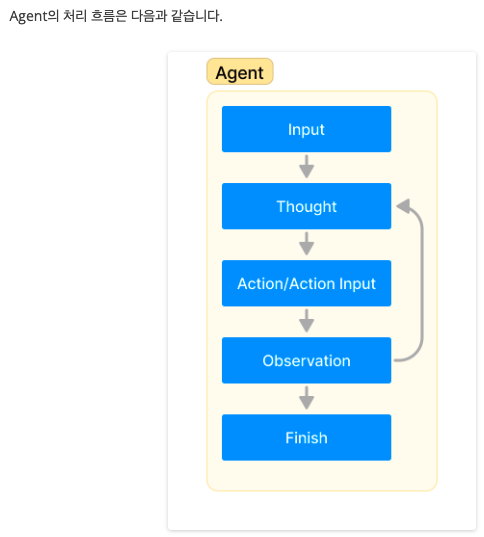

## Langsmith
- langsmith는 langchain에서 만든 온라인 기반의 LLM 애플리케이션 모니터링, 테스트 지원, 배포 지원 도구이다. 상세한 내용은 별도의 챕터에서 따로 설명하도록 하고, 이번 챕터에서는 모니터링 트레이스 기능을 간단하게 살펴본다.
- Agent에서 분기가 어떻게 이루어지고, Agent가 어떤 구조로 판단을 하는지를 상세하게 모니터링할 수 있다.

### [Langchain API key 생성](https://smith.langchain.com/o/9b0045e0-4ff2-5e75-ab7d-5e8ee81fb8d1/settings)

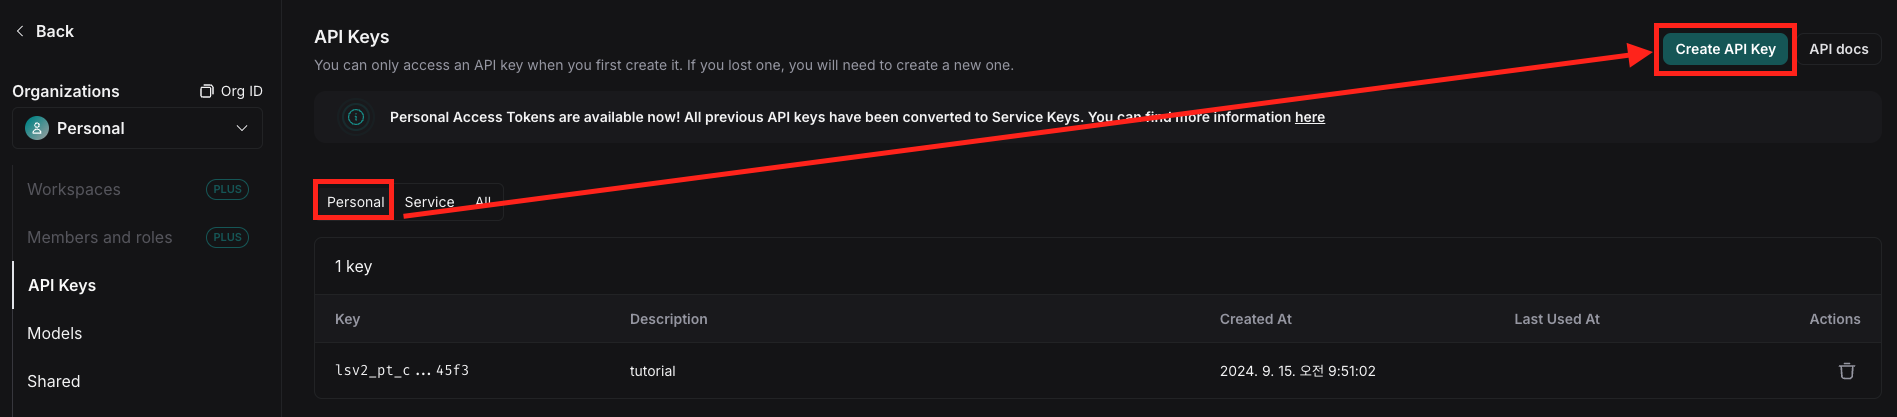

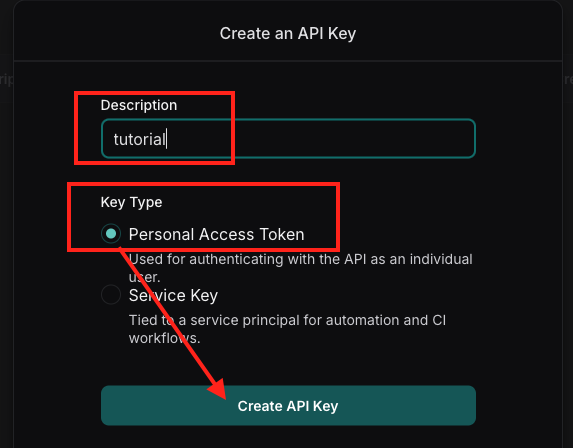

### Langsmith 설정
- `LANGCHAIN_TRACING_V2`: "true" 로 설정하면 추적을 시작합니다.
- `LANGCHAIN_ENDPOINT`: https://api.smith.langchain.com 변경하지 않습니다.
- `LANGCHAIN_API_KEY`: 이전 단계에서 발급받은 키 를 입력합니다.
- `LANGCHAIN_PROJECT`: 프로젝트 명 을 기입하면 해당 프로젝트 그룹으로 모든 실행(Run) 이 추적됩니다.

In [ ]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "AGENT TUTORIAL"
os.environ["LANGCHAIN_API_KEY"] = "생성한 키 입력"

## Tavily

### LLMs의 한계점
- 대규모 언어 모델(Large Language Models, LLMs)은 자연어 처리 분야에서 혁명적인 발전을 이루었지만, 여전히 중요한 한계점을 가지고 있습니다. 그 중 하나는 최신 정보 처리의 어려움입니다.
- 대부분의 LLM은 특정 시점까지의 데이터로 학습되어 있어, 그 이후의 정보나 실시간 변화하는 상황에 대해 정확한 답변을 제공하기 어렵습니다.

### Tavily 주요 특징
- `AI 최적화`: LLM과의 원활한 통합을 위해 설계되었습니다.
- `최신 정보`: 실시간으로 업데이트되는 정보를 제공합니다.
- `다양한 검색 모드`: 일반 검색, 뉴스 검색, 이미지 검색 등 다양한 모드를 제공합니다.
- `콘텐츠 필터링`: 신뢰할 수 있는 소스의 정보만을 제공합니다.
- `무료 사용량`: 월 1,000회의 무료 API 호출을 제공합니다.

### [Tavily Key 발급](https://app.tavily.com/sign-in)

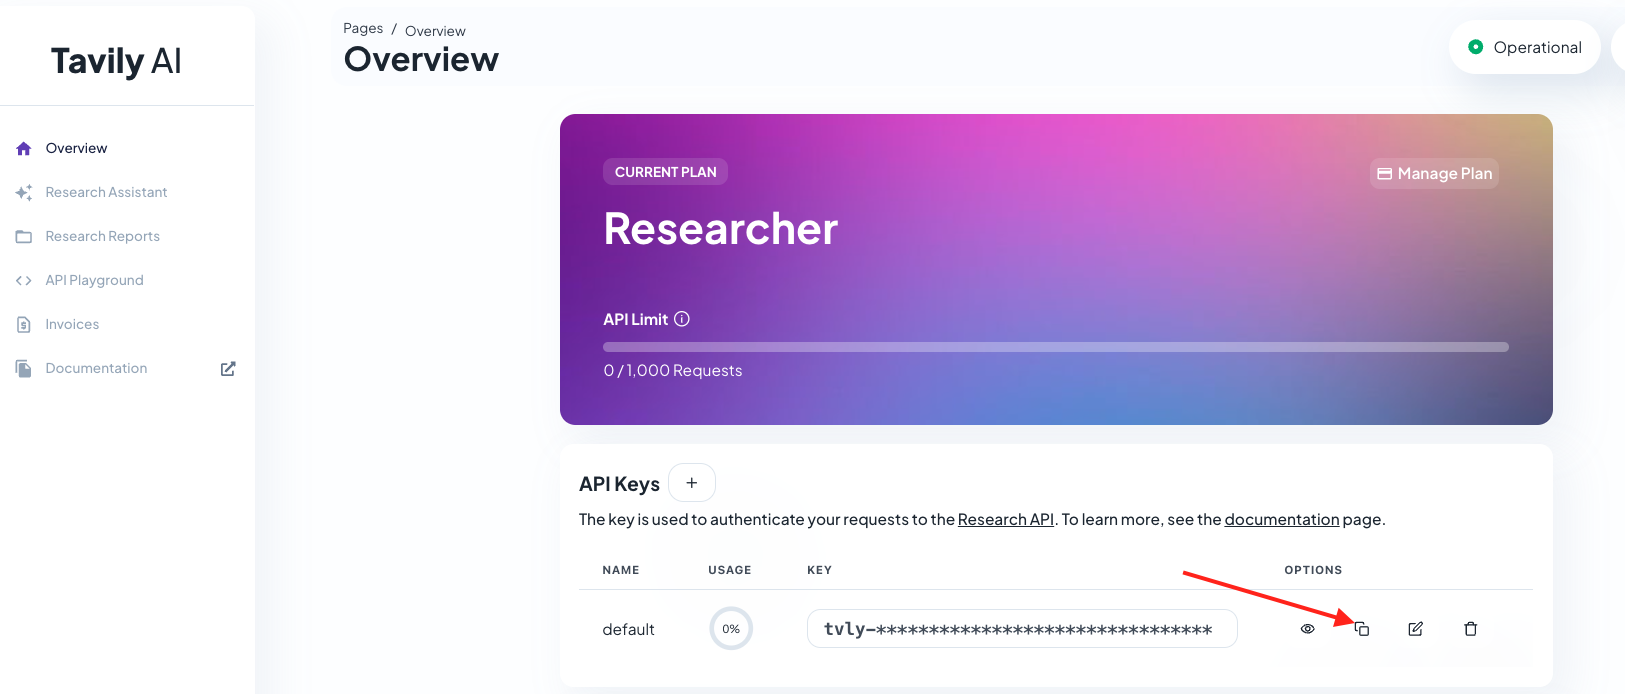

In [ ]:
# TAVILY API KEY를 기입합니다.
os.environ["TAVILY_API_KEY"] = "생성한 키 입력"

## Agent 예제

### TavilySearchResults

In [ ]:
# TavilySearchResults 클래스를 langchain_community.tools.tavily_search 모듈에서 가져옵니다.
from langchain_community.tools.tavily_search import TavilySearchResults

# TavilySearchResults 클래스의 인스턴스를 생성합니다
# k=5은 검색 결과를 5개까지 가져오겠다는 의미입니다
search = TavilySearchResults(k=5)

- search.invoke 함수는 주어진 문자열에 대한 검색을 실행합니다.

In [ ]:
# 검색 결과를 가져옵니다.
search.invoke("판교 카카오 프렌즈샵 아지트점의 전화번호는 무엇인가요?")

[{'url': 'https://blog.naver.com/PostView.naver?blogId=amour1115&logNo=223386213560',
  'content': '카카오 프렌즈 판교 아지트점. . 연중무휴 12:00-21:00. 토, 일 12:00-20:00. . 경기 성남시 분당구 판교역로 166. 카카오 판교 아지트 1층 카카오 프렌즈. 031-301-7225. 존재하지 않는 이미지입니다.'},
 {'url': 'https://naise.tistory.com/456',
  'content': '카카오프렌즈샵 판교 아지트점: 인테리어 소품부터 소형 가전까지, 다양한 상품이 가득합니다.이곳은 카카오프렌즈의 귀여운 캐릭터들이 담긴 디자인의 제품들이 많아, 당신의 공간을 따뜻하게 만들어 줄 것입니다.먼저, 인테리어 소품 섹션에서는 각양각색의 장식품을 만나볼 수 있습니다.'},
 {'url': 'https://www.youtube.com/watch?v=BpynjxkklPc',
  'content': '춘식이도 ~최근 신규오픈한 카카오본사 매장 🎉vip 투어로 다녀왔습니다 🏃\u200d♀️ 지점명 : 카카오프렌즈 판교아지트 주소 : 경기 성남시 분당구 ...'},
 {'url': 'https://blog.naver.com/PostView.naver?blogId=psu3001&logNo=223054273748',
  'content': '살랑의 꼬리살랑살랑\n블로그\n[판교] 카카오 신사옥 판교 카카오 아지트 방문기(주차요금)\n#판교\n#카카오\n#카카오아지트\n#카카오프렌즈\n\u200b\n안녕하세요. 이러니 모두가 일해보고 싶은 기업인가 봐요 ㅎㅎㅎ\n카카오 아지트 주차요금\n기본요금\n최초 30분 : 1,000원\n추가 10분당 : 1,000원\n일 최대 요금 : 36,000원\n올리브영에서 만원 이상 구매하면 1시간 주차 등록을 해줍니다.\n 작성자 이외의 방문자에게는 이용이 제한되었습니다.\n{ALERTMESSAGE}\n이용제한 파일 : {F

### Retriever

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain.document_loaders import PyPDFLoader

# PDF 파일 로드. 파일의 경로 입력
loader = PyPDFLoader(DATA_PATH+"SPRI_AI_Brief_2023년12월호_F.pdf")

# 텍스트 분할기를 사용하여 문서를 분할합니다.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

# 문서를 로드하고 분할합니다.
split_docs = loader.load_and_split(text_splitter)

# VectorStore를 생성합니다.
vector = FAISS.from_documents(split_docs, OpenAIEmbeddings())

# Retriever를 생성합니다.
retriever = vector.as_retriever()

- 이 함수는 `retriever` 객체의 `get_relevant_documents` 메소드를 사용하여 "YouTube의 2024년부터 AI 생성콘텐츠 표시 의무화에 대한 내용을 알려줘" 와 관련된 문서들 중 첫 번째 문서를 반환합니다.
- 이는 특정 쿼리에 대한 가장 관련성 높은 문서 를 찾는 데 사용됩니다.

In [ ]:
# PDf 문서에서 Query 에 대한 관련성 높은 Chunk 를 가져옵니다.
retriever.get_relevant_documents(
    "YouTube의 2024년부터 AI 생성콘텐츠 표시 의무화에 대한 내용을 알려줘"
)[0]

<ipython-input-9-706e04952abd>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever.get_relevant_documents(


Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 16}, page_content='SPRi AI Brief |  \n2023-12 월호\n14유튜브 , 2024년부터 AI 생성 콘텐츠 표시 의무화 \nn유튜브가 몇 달 안에 생성 AI를 사용한 콘텐츠에 AI 라벨 표시를 의무화하기로 했으며 , 이를 \n준수하지 않는 콘텐츠는 삭제하고 크리에이터에 대한 수익 배분도 중단할 수 있다고 설명\nn유튜브는 AI 생성 콘텐츠가 신원 파악이 가능한 개인을 모방한 경우 개인정보 침해 신고 \n절차에 따라 콘텐츠 삭제 요청도 받을 계획KEY Contents\n£유튜브 , 생성 AI 콘텐츠에 AI 라벨 표시 안 하면 콘텐츠 삭제\nn유튜브가 2023 년 11월 14일 공식 블로그를 통해 몇 달 안에 생성 AI를 사용한 콘텐츠에 AI \n라벨을 표시하는 새로운 규칙을 시행한다고 발표 \n∙실제로 일어나지 않은 사건을 사실적으로 묘사하거나 실제로 하지 않은 말이나 행동을 보여주는 콘텐츠와 \n같이 AI 도구를 사용해 사실적으로 변경되거나 합성된 콘텐츠에는 AI 라벨을 표시 필요\n∙유튜브는 이러한 규칙이 선거나 분쟁 상황, 공중 보건, 공직자 관련 문제와 같이 민감한 주제를 다루는 \n콘텐츠에서 특히 중요하다고 강조했으며 , 크리에이터가 AI로 제작한 콘텐츠에 AI 라벨을 표시하지 않으면 \n해당 콘텐츠는 삭제되고 광고 수익을 배분하는 유튜브 파트너 프로그램도 정지될 수 있음\n∙유튜브는 두 가지 방식으로 AI를 이용한 콘텐츠의 변경이나 합성 여부를 시청자에게 전달할 계획으로 \n동영상 설명 패널에 라벨을 표시하는 방식이 기본이며 , 민감한 주제를 다루는 특정 유형의 콘텐츠는 동영상 \n플레이어에 더욱 눈에 띄는 라벨을 적용 \n∙유튜브는 커뮤니티 정책에 위반되는 일부 합성 콘텐츠에 대해서는 라

- 이제 우리가 검색을 수행할 인덱스를 채웠으므로, 이를 에이전트가 제대로 사용할 수 있는 도구로 쉽게 변환할 수 있습니다.
- `create_retriever_tool` 함수는 `langchain` 라이브러리의 `tools.retriever` 모듈에서 가져온다. 이 함수는 특정 데이터를 검색하기 위한 도구를 생성하는 데 사용된다.
- `langchain`은 언어 모델과 관련된 다양한 기능을 제공하는 라이브러리로, 이 중 검색 도구 생성 기능은 데이터 검색 및 처리 작업을 용이하게 한다.

In [ ]:
# langchain 패키지의 tools 모듈에서 retriever 도구를 생성하는 함수를 가져옵니다.
from langchain.tools.retriever import create_retriever_tool

- 이 함수는 `create_retriever_tool`을 호출하여 `retriever_tool`을 생성합니다. 이 도구는 `LangSmith`에 대한 정보를 검색하는 데 사용됩니다.
- 사용자가 `LangSmith`에 대해 궁금한 점이 있을 때, 이 도구를 통해 질문을 해결할 수 있습니다. 함수는 `retriever` 인스턴스, 검색 도구의 이름인 `langsmith_search`, 그리고 사용자에게 도구 사용 방법을 안내하는 메시지를 인자로 받습니다.

In [ ]:
retriever_tool = create_retriever_tool(
    retriever,
    name="pdf_search",
    description="2023년 12월 AI 관련 정보를 PDF 문서에서 검색합니다. '2023년 12월 AI 산업동향' 과 관련된 질문은 이 도구를 사용해야 합니다!",
)

### Tools
- 이제 두 가지를 모두 만들었으므로, Agent 가 사용할 도구 목록을 만들 수 있습니다.
- `tools` 리스트는 `search`와 `retriever_tool`을 포함합니다.
- 이 리스트는 검색 및 정보 검색 도구를 저장하는 데 사용됩니다. 각 요소는 특정 작업을 수행하는 데 필요한 기능을 제공합니다.

In [ ]:
# tools 리스트에 search와 retriever_tool을 추가합니다.
tools = [search, retriever_tool]

### Create the agent
- 이제 도구를 정의했으니 에이전트를 생성할 수 있습니다. OpenAI Functions 에이전트를 사용할 것입니다.
- 먼저, 에이전트가 활용할 LLM을 정의합니다.

In [ ]:
from langchain_openai import ChatOpenAI

# ChatOpenAI 클래스를 langchain_openai 모듈에서 가져옵니다.
llm = ChatOpenAI(model="gpt-4-turbo-preview", temperature=0)


- 다음으로, 에이전트를 안내하기 위해 사용하고 싶은 프롬프트를 선택합니다.
- 다운로드 받아 활용할 프롬프트: https://smith.langchain.com/hub/hwchase17/openai-functions-agent
- `hub.pull()` 함수를 사용하여 리소스를 가져온 후, `prompt.messages`를 통해 해당 리소스의 메시지에 접근합니다.

In [ ]:
from langchain import hub

# hub에서 prompt를 가져옵니다 - 이 부분을 수정할 수 있습니다!
prompt = hub.pull("hwchase17/openai-functions-agent")

# prompt 의 messages를 출력합니다.
prompt.messages


[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

- 이제 LLM, 프롬프트 및 도구로 에이전트를 초기화할 수 있습니다. 에이전트는 입력을 받아 어떤 Action 을 취할지 결정하는 역할을 합니다.
- 중요한 것은 에이전트가 Action 들을 실행하지 않는다는 것입니다 - 그것은 `AgentExecutor(다음 단계)`에 의해 수행됩니다.

In [ ]:
from langchain.agents import create_openai_functions_agent

# OpenAI 함수 기반 에이전트를 생성합니다.
# llm, tools, prompt를 인자로 사용합니다.
agent = create_openai_functions_agent(llm, tools, prompt)


- 마지막으로, 우리는 에이전트(agent)를 `AgentExecutor` 내부의 도구들과 결합합니다(이는 반복적으로 에이전트를 호출하고 도구들을 실행할 것입니다).
- 이 코드는 `langchain.agents` 모듈에서 `AgentExecutor` 클래스를 가져와 인스턴스를 생성합니다.
- 생성 시, `agent`, `tools` 객체를 인자로 전달하고, `verbose=True`를 설정하여 상세한 로그 출력을 활성화합니다.

`AgentExecutor`는 주어진 에이전트와 도구들을 사용하여 작업을 실행하는 역할을 합니다.

In [ ]:
from langchain.agents import AgentExecutor

# AgentExecutor 클래스를 사용하여 agent와 tools를 설정하고, 상세한 로그를 출력하도록 verbose를 True로 설정합니다.
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


### Run the agent
- 이제 몇 가지 질의에 대해 에이전트를 실행할 수 있습니다!
- 현재 이러한 `모든 질의는 상태(Stateless) 가 없는 질의`입니다(이전 상호작용을 기억하지 않습니다).
- `agent_executor` 객체의 `invoke` 메소드는 딕셔너리 형태의 인자를 받아 처리합니다.
- 이 예제에서는 `input 키`에 `hi! 값`을 할당한 딕셔너리를 인자로 전달하고 있습니다. 이는 일반적으로 AI 에이전트, 함수 실행기, 또는 명령 처리기 등의 객체에서 입력을 처리하기 위해 사용됩니다.

In [ ]:
# 'agent_executor' 객체의 'invoke' 메소드를 호출하여,
# 'input' 키와 '안녕, 반가워' 값을 가진 딕셔너리를 인자로 전달합니다.
response = agent_executor.invoke({"input": "2024년 아시안컵 대한민국의 축구 경기 결과를 알려줘."})
print(f'답변: {response["output"]}')



Invoking: `tavily_search_results_json` with `{'query': '2024년 아시안컵 대한민국 축구 경기 결과'}`


[{'url': 'https://olympics.com/ko/news/2024-afc-u23-asian-cup-full-schedule-all-results-scores-and-standings-complete-list', 'content': '2024 afc u23 아시안컵: 결선 토너먼트 일정 및 결과 8강전. 4월 25일. 경기 25: 카타르 2-4 일본 (연장전) 경기 26: 대한민국 2-2 인도네시아 (연장전, 승부차기 10-11) 인도네시아 준결승 진출; 4월 26일. 경기 28: 우즈베키스탄 2-0 사우디아라비아 (17:00 현지시간) 경기 27 ...'}, {'url': 'https://www.heykakao.kr/2024/01/afc.html', 'content': '■ AFC 카타르 아시안컵 대한민국팀 엔트리\nFW\xa0 : 손흥민, 조규성\nMF : 정우영, 이강인, 이재성, 박용우, 홍현석, 황인범, 문선민, 황희찬, 양현준, 이순민, 박진섭, 오현규, 홍현석, 정우영\nDF : 박진섭, 정승현, 김민재, 김영권, 이기제, 설영우, 김태환, 김주성, 김진수, 정승현\nGK : 김승규, 조현우, 송범근\n댓글\n이 블로그의 인기 게시물\nKT 지니tv 채널번호 알아보기\nsk브로드밴드 Btv 채널번호 알아보기\n6009번 공항리무진버스 시간표,노선도(대치동~인천공항)\n번역\n이 블로그 검색 ● 01.20(토요일) 20:30\n대한민국 2 vs 2 요르단\n● 01.25(목요일) 20:30\n대한민국 3 vs 3 말레이시아\n대한민국 - 정우영(21분), 이강인(83분), 손흥민(94분)\n말레이시아 - 할림(51분), 아이만(62분), 모랄레스(90+15분)\n우리나라가 조별리그를 1위로 통과하게되면 일본이 속해있는 D조 2위와 맞붙게되는데요.\n ● 16강전 - 01.31(수요일) 

### [LangSmith 추적](https://smith.langchain.com/o/9b0045e0-4ff2-5e75-ab7d-5e8ee81fb8d1/projects/p/9fc1810b-928a-49be-94bf-f00e20dfa01c?timeModel=%7B%22duration%22%3A%227d%22%7D)

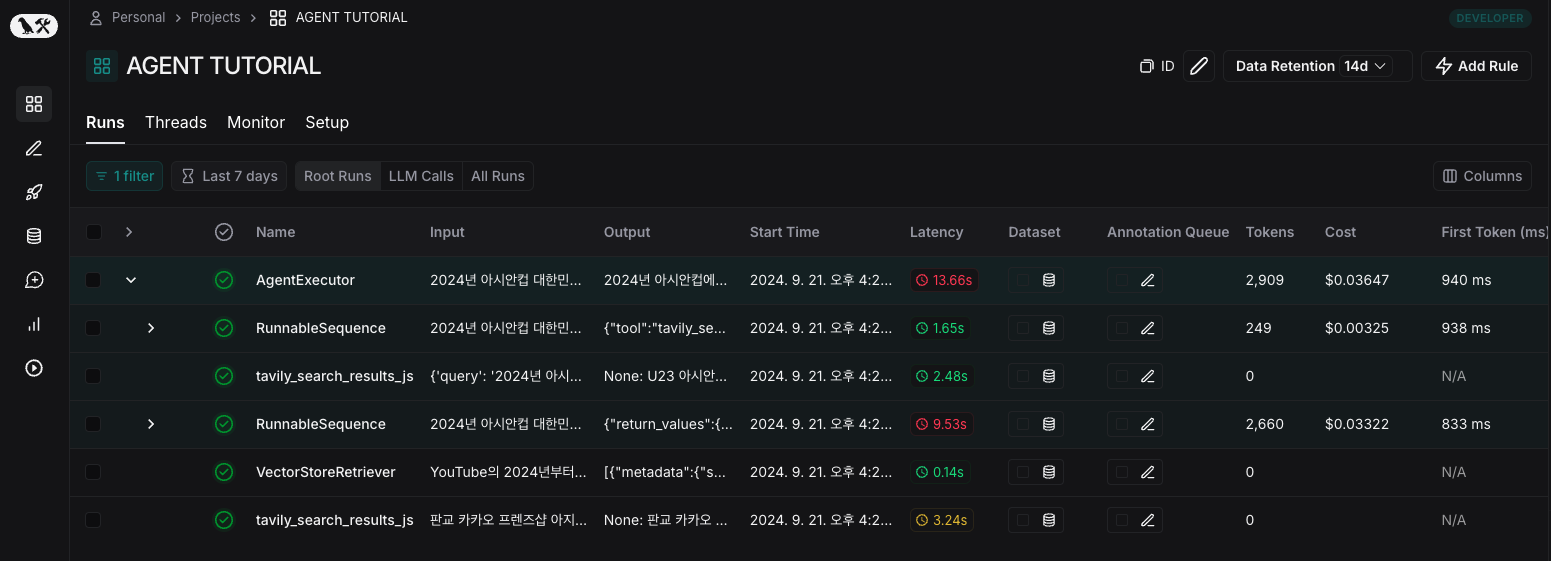

### Adding in memory
- 앞서 언급했듯이, 이 에이전트는 상태가 없습니다. 이는 이전 상호작용을 기억하지 않는다는 것을 의미합니다. 이에게 메모리를 부여하기 위해서는 이전 `chat_history`를 전달해야 합니다.
- 우리가 사용하는 프롬프트 때문에 `chat_history`라고 불러야 합니다. 다른 프롬프트를 사용한다면 변수 이름을 변경할 수 있습니다.
- 함수는 사용자의 `입력(input)`과 `채팅 기록(chat_history)`을 매개변수로 받습니다. 여기서, `chat_history`는 채팅의 첫 번째 메시지를 처리할 때 `빈 리스트([])`로 전달됩니다. 이는 채팅 세션을 시작할 때 기존의 대화 기록이 없음을 나타냅니다.

In [ ]:
# 채팅의 첫 번째 메시지이므로 chat_history에 빈 리스트를 전달합니다.
response = agent_executor.invoke(
    {"input": "hi! my name is bob", "chat_history": []}
)
print(f'답변: {response["output"]}')


Hello, Bob! How can I assist you today?

> Finished chain.
답변: Hello, Bob! How can I assist you today?


- 이 모듈은 `langchain_core.messages`에서 `AIMessage`와 `HumanMessage` 클래스를 가져옵니다. AI와 인간 간의 메시지 교환을 처리하는 데 사용될 수 있습니다.
- `AIMessage`는 AI가 생성한 메시지를 나타내며, `HumanMessage`는 사용자가 입력한 메시지를 나타냅니다.

In [ ]:
# langchain_core.messages에서 AIMessage와 HumanMessage를 가져옵니다.
from langchain_core.messages import AIMessage, HumanMessage


- `agent_executor.invoke` 메소드는 `대화 이력(chat_history)`과 사용자의 `새로운 입력(input)`을 매개변수로 받습니다.
- `chat_history`는 `HumanMessage`와 `AIMessage` 객체의 리스트로, 각각 사용자와 AI의 메시지를 나타냅니다.

이 예시에서는 `사용자`가 "hi! my name is bob"이라고 인사하고, `AI`가 "Hello Bob! How can I assist you today?"라고 응답한 이후, `사용자`가 "what's my name?"이라고 새로운 질문을 합니다.

In [ ]:
response = agent_executor.invoke(
    {
        "chat_history": [
            HumanMessage(content="Hi! I'm bob. Glad to meet you."),
            AIMessage(
                content="Hello bob! I'm glad to meet you too. How can I assist you today?"
            ),
        ],
        "input": "What's my name?",
    }
)
print(f'답변: {response["output"]}')


Your name is Bob! How can I help you further, Bob?

> Finished chain.
답변: Your name is Bob! How can I help you further, Bob?


- 만약 이 메시지들을 자동으로 추적하고 싶다면, 이를 `RunnableWithMessageHistory`로 감싸면 됩니다.

In [ ]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory


- `ChatMessageHistory` 클래스의 인스턴스를 생성하여 `message_history` 변수에 할당합니다. 이 인스턴스는 채팅 메시지의 기록을 관리하는 데 사용됩니다.

In [ ]:
# 채팅 메시지 기록을 관리하는 객체를 생성합니다.
message_history = ChatMessageHistory()


- `RunnableWithMessageHistory` 클래스는 `에이전트 실행자(agent_executor)`와 메시지 기록을 관리합니다. 이 클래스는 세션 ID를 기반으로 메시지 기록을 처리하는 람다 함수와, 입력 메시지 및 채팅 기록의 키를 인자로 받습니다.
- 여기서 세션 ID는 실제로 사용되지 않으며, 단순한 메모리 내 `ChatMessageHistory`를 사용하는 예시입니다.
- 기본적으로 실행 가능 항목은 문자열인 `session_id`라는 단일 구성 매개변수를 받습니다. 이 매개변수는 주어진 `session_id`와 일치하는 새 채팅 메시지 기록을 만들거나 기존 채팅 메시지 기록을 조회하는 데 사용됩니다.

In [ ]:
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # 대부분의 실제 시나리오에서 세션 ID가 필요하기 때문에 이것이 필요합니다
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    lambda session_id: message_history,
    # 프롬프트의 질문이 입력되는 key: "input"
    input_messages_key="input",
    # 프롬프트의 메시지가 입력되는 key: "chat_history"
    history_messages_key="chat_history",
)


- `agent_with_chat_history.invoke` 함수는 사용자 입력과 설정을 인자로 받아 처리합니다.
- 이 예제에서는 사용자의 입력("hi! I'm bob")과 설정(config)을 전달합니다.
- 설정에는 `session_id`가 포함되어 있으나, 이는 간단한 메모리 내 `ChatMessageHistory`를 사용하는 예제이므로 실제로는 사용되지 않습니다.

이 코드는 대부분의 실제 상황에서 세션 ID가 필요함을 보여주지만, 특정 구현에서는 그렇지 않을 수 있음을 보여줍니다.

In [ ]:
response = agent_with_chat_history.invoke(
    {"input": "Hi! I'm bob. Glad to meet you."},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "MyTestSessionID"}},
)
print(f"답변: {response['output']}")


Hi Bob! It's great to meet you too. How can I assist you today?

> Finished chain.
답변: Hi Bob! It's great to meet you too. How can I assist you today?


In [ ]:
response = agent_with_chat_history.invoke(
    {"input": "판교 카카오 프렌즈샵 아지트점의 전화번호를 검색하여 결과를 알려주세요."},
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "MyTestSessionID"}},
)
print(f"답변: {response['output']}")



Invoking: `tavily_search_results_json` with `{'query': '판교 카카오 프렌즈샵 아지트점 전화번호'}`


[{'url': 'https://www.placeview.co.kr/id/MTcxODgwMDMxOCAg', 'content': '성남시 카카오프렌즈 판교점에 대한 장소정보(전화번호,주소,오시는길안내,지도,로드뷰,홈페이지,교통정보,리뷰등) ... 카카오프렌즈 판교아지트점 (031-601-7225) 경기 성남시 분당구 판교역로 166 . 카카오프렌즈 현대백화점판교점 (031-5170-2451) ...'}, {'url': 'https://blog.naver.com/PostView.naver?blogId=amour1115&logNo=223386213560', 'content': '카카오 프렌즈 판교 아지트점. . 연중무휴 12:00-21:00. 토, 일 12:00-20:00. . 경기 성남시 분당구 판교역로 166. 카카오 판교 아지트 1층 카카오 프렌즈. 031-301-7225. 존재하지 않는 이미지입니다.'}, {'url': 'https://m.blog.naver.com/circle-__-/223109287568', 'content': '[분당] 판교 카카오 프렌즈샵 _ 판교 아지트 _ 판교 가볼만 한 곳 ... 카카오프렌즈 판교아지트점. 경기도 성남시 분당구 판교역로 166 카카오판교아지트 1층 카카오프렌즈 ...'}, {'url': 'https://blog.naver.com/PostView.naver?blogId=astagram123&logNo=223185872381&noTrackingCode=true', 'content': '๑ 카카오프렌즈 판교아지트점 ๑ ♡ 위치 : 성남시 분당구 판교역로 116 카카오판교아지트 1층 카카오프렌...'}, {'url': 'https://m.blog.naver.com/celina_827/222924602339', 'content': '너무 귀여운 카카오 속 세상이예요ㅠㅠ\n\u

In [ ]:
response = agent_with_chat_history.invoke(
    {
        "input": "YouTube 2024년부터 AI 생성콘텐츠 표시 의무화에 대한 내용을 PDF 문서에서 알려줘"
    },
    # 세션 ID를 설정합니다.
    # 여기서는 간단한 메모리 내 ChatMessageHistory를 사용하기 때문에 실제로 사용되지 않습니다
    config={"configurable": {"session_id": "MyTestSessionID"}},
)
print(f"답변: {response['output']}")



Invoking: `pdf_search` with `{'query': 'YouTube 2024년 AI 생성콘텐츠 표시 의무화'}`


SPRi AI Brief |  
2023-12 월호
14유튜브 , 2024년부터 AI 생성 콘텐츠 표시 의무화 
n유튜브가 몇 달 안에 생성 AI를 사용한 콘텐츠에 AI 라벨 표시를 의무화하기로 했으며 , 이를 
준수하지 않는 콘텐츠는 삭제하고 크리에이터에 대한 수익 배분도 중단할 수 있다고 설명
n유튜브는 AI 생성 콘텐츠가 신원 파악이 가능한 개인을 모방한 경우 개인정보 침해 신고 
절차에 따라 콘텐츠 삭제 요청도 받을 계획KEY Contents
£유튜브 , 생성 AI 콘텐츠에 AI 라벨 표시 안 하면 콘텐츠 삭제
n유튜브가 2023 년 11월 14일 공식 블로그를 통해 몇 달 안에 생성 AI를 사용한 콘텐츠에 AI 
라벨을 표시하는 새로운 규칙을 시행한다고 발표 
∙실제로 일어나지 않은 사건을 사실적으로 묘사하거나 실제로 하지 않은 말이나 행동을 보여주는 콘텐츠와 
같이 AI 도구를 사용해 사실적으로 변경되거나 합성된 콘텐츠에는 AI 라벨을 표시 필요
∙유튜브는 이러한 규칙이 선거나 분쟁 상황, 공중 보건, 공직자 관련 문제와 같이 민감한 주제를 다루는 
콘텐츠에서 특히 중요하다고 강조했으며 , 크리에이터가 AI로 제작한 콘텐츠에 AI 라벨을 표시하지 않으면 
해당 콘텐츠는 삭제되고 광고 수익을 배분하는 유튜브 파트너 프로그램도 정지될 수 있음
∙유튜브는 두 가지 방식으로 AI를 이용한 콘텐츠의 변경이나 합성 여부를 시청자에게 전달할 계획으로 
동영상 설명 패널에 라벨을 표시하는 방식이 기본이며 , 민감한 주제를 다루는 특정 유형의 콘텐츠는 동영상 
플레이어에 더욱 눈에 띄는 라벨을 적용 
∙유튜브는 커뮤니티 정책에 위반되는 일부 합성 콘텐츠에 대해서는 라벨 지정 여부와 관계없이 삭제할 
방침으로 , 가령 사실적인 폭력을 보여주는 합성 동영상이 시청자에게 충격이나 혐오감을 줄 수 있다면 
삭제될 수 있음
£유튜브 , 특정

- chat_history 확인

In [ ]:
response["chat_history"]

[HumanMessage(content="Hi! I'm bob. Glad to meet you.", additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hi Bob! It's great to meet you too. How can I assist you today?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='판교 카카오 프렌즈샵 아지트점의 전화번호를 검색하여 결과를 알려주세요.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='판교 카카오 프렌즈샵 아지트점의 전화번호는 **031-601-7225** 입니다. 위치는 경기 성남시 분당구 판교역로 166에 있습니다. 도움이 더 필요하시면 알려주세요!', additional_kwargs={}, response_metadata={})]

# [SQL+CSV](https://python.langchain.com/v0.1/docs/use_cases/sql/csv/#sql)

## SQL - sqlite

In [ ]:
from langchain_community.utilities import SQLDatabase
from sqlalchemy import create_engine

engine = create_engine("sqlite:///titanic.db")

In [ ]:
import pandas as pd

df = pd.read_csv(DATA_PATH+"titanic.csv")
print(df.shape)
print(df.columns.tolist())

(20, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


- sqlite에 titanic 데이터 추가

In [ ]:
df.to_sql("titanic", engine, index=False)

20

In [ ]:
db = SQLDatabase(engine=engine)
print(db.dialect)
print(db.get_usable_table_names())
db.run("SELECT * FROM titanic WHERE Age < 10;")

sqlite
['titanic']


"[(8, 0, 3, 'Palsson, Master. Gosta Leonard', 'male', 2.0, 3, 1, '349909', 21.075, None, 'S'), (11, 1, 3, 'Sandstrom, Miss. Marguerite Rut', 'female', 4.0, 1, 1, 'PP 9549', 16.7, 'G6', 'S'), (17, 0, 3, 'Rice, Master. Eugene', 'male', 2.0, 4, 1, '382652', 29.125, None, 'Q')]"

## SQL Agent

In [ ]:
from langchain_community.agent_toolkits import create_sql_agent
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
agent_executor = create_sql_agent(llm, db=db, agent_type="openai-tools", verbose=True)

In [ ]:
agent_executor.invoke({"input": "what's the average age of survivors"})


Invoking: `sql_db_list_tables` with `{}`


titanic
Invoking: `sql_db_schema` with `{'table_names': 'titanic'}`



CREATE TABLE titanic (
	"PassengerId" BIGINT, 
	"Survived" BIGINT, 
	"Pclass" BIGINT, 
	"Name" TEXT, 
	"Sex" TEXT, 
	"Age" FLOAT, 
	"SibSp" BIGINT, 
	"Parch" BIGINT, 
	"Ticket" TEXT, 
	"Fare" FLOAT, 
	"Cabin" TEXT, 
	"Embarked" TEXT
)

/*
3 rows from titanic table:
PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
1	0	3	Braund, Mr. Owen Harris	male	22.0	1	0	A/5 21171	7.25	None	S
2	1	1	Cumings, Mrs. John Bradley (Florence Briggs Thayer)	female	38.0	1	0	PC 17599	71.2833	C85	C
3	1	3	Heikkinen, Miss. Laina	female	26.0	0	0	STON/O2. 3101282	7.925	None	S
*/
Invoking: `sql_db_query` with `{'query': 'SELECT AVG(Age) AS Average_Age FROM titanic WHERE Survived = 1'}`


[(32.125,)]The average age of survivors is approximately 32.125 years.

> Finished chain.


{'input': "what's the average age of survivors",
 'output': 'The average age of survivors is approximately 32.125 years.'}

## Pandase

### Chain

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_experimental.tools import PythonAstREPLTool

tool = PythonAstREPLTool(locals={"df": df})
tool.invoke("df['Fare'].mean()")

22.19937

- llm

In [ ]:
llm_with_tools = llm.bind_tools([tool], tool_choice=tool.name)
llm_with_tools.invoke(
    "I have a dataframe 'df' and want to know the correlation between the 'Age' and 'Fare' columns"
)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ejI2a60MV0PVyC7GMq04ojeE', 'function': {'arguments': '{"query":"df[[\'Age\', \'Fare\']].corr()"}', 'name': 'python_repl_ast'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 125, 'total_tokens': 139, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ed614a1b-279e-4273-a8a2-94435fa777ef-0', tool_calls=[{'name': 'python_repl_ast', 'args': {'query': "df[['Age', 'Fare']].corr()"}, 'id': 'call_ejI2a60MV0PVyC7GMq04ojeE', 'type': 'tool_call'}], usage_metadata={'input_tokens': 125, 'output_tokens': 14, 'total_tokens': 139})

- sql

In [ ]:
from langchain.output_parsers.openai_tools import JsonOutputKeyToolsParser

parser = JsonOutputKeyToolsParser(key_name=tool.name, first_tool_only=True)
query_chain = llm_with_tools | parser

query_chain.invoke(
    "I have a dataframe 'df' and want to know the correlation between the 'Age' and 'Fare' columns"
)

{'query': "df[['Age', 'Fare']].corr()"}

- chain

In [ ]:
system = f"""
You have access to a pandas dataframe `df`. \
Here is the output of `df.head().to_markdown()`:
Given a user question, write the Python code to answer it. \
Return ONLY the valid Python code and nothing else. \
Don't assume you have access to any libraries other than built-in Python ones and pandas."""

prompt = ChatPromptTemplate.from_messages([("system", system), ("human", "{question}")])

In [ ]:
code_chain = prompt | llm_with_tools | parser | tool
code_chain.invoke({"question": "What's the correlation between age and fare"})

0.3272778757264781

### Agent

In [ ]:
from langchain_experimental.agents import create_pandas_dataframe_agent

agent = create_pandas_dataframe_agent(llm, df, agent_type="openai-tools", verbose=True, allow_dangerous_code=True)
agent.invoke(
    {
        "input": "What's the correlation between age and fare? is that greater than the correlation between fare and survival?"
    }
)


Invoking: `python_repl_ast` with `{'query': "df[['Age', 'Fare']].corr()"}`


           Age      Fare
Age   1.000000  0.327278
Fare  0.327278  1.000000
Invoking: `python_repl_ast` with `{'query': "df[['Fare', 'Survived']].corr()"}`


              Fare  Survived
Fare      1.000000  0.176084
Survived  0.176084  1.000000The correlation between age and fare is 0.327278, while the correlation between fare and survival is 0.176084. Therefore, the correlation between age and fare is greater than the correlation between fare and survival.

> Finished chain.


{'input': "What's the correlation between age and fare? is that greater than the correlation between fare and survival?",
 'output': 'The correlation between age and fare is 0.327278, while the correlation between fare and survival is 0.176084. Therefore, the correlation between age and fare is greater than the correlation between fare and survival.'}